In [17]:
import numpy as np
import pandas as pd
from sklearn import model_selection as ms
from sklearn import datasets as dt
from matplotlib import pyplot as plt
from sklearn import linear_model as lm


In [15]:
n_sample = 100
n_outliers = 5
n_features = 1

X, y, coef = dt.make_regression(
    n_samples = n_sample,
    n_features = n_features,
    n_informative = 1,
    noise = 10,
    coef = True,
    random_state = 0
)

#add outliers
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, n_features))
y[:n_outliers] = -3 + 10 * np.random.normal(size=(n_outliers))

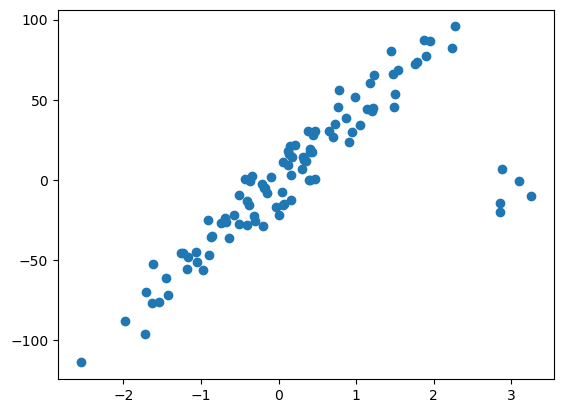

In [16]:
plt.scatter(X,y)

In [62]:
#modeling

#linear regression
lr = lm.LinearRegression()
lr.fit(X, y)


#Lasso L1( Tende a zerar os parametros )
lasso = lm.Lasso(alpha=10)
lasso.fit(X, y)

# Ridge L2 (smoothing - amenizacao dos parametros)
ridge = lm.Ridge(alpha=10)
ridge.fit(X, y)

# Ridge L1&l2
elastic_net = lm.ElasticNet(alpha=10, l1_ratio=0.5)
elastic_net.fit(X, y)


# RAMSAC (Ignora os outliers)
ransac = lm.RANSACRegressor()
ransac.fit(X, y)

inliner = ransac.inlier_mask_
outlier = np.logical_not(ransac.inlier_mask_)


In [63]:
#predict
X_plot = np.arange(X.min(), X.max())[:,np.newaxis]

plot_pred_lm = lr.predict(X_plot)
plot_pred_lasso = lasso.predict(X_plot)
plot_pred_ridge = ridge.predict(X_plot)
plot_pred_ransac = ransac.predict(X_plot)
plot_pred_elastic = elastic_net.predict(X_plot)

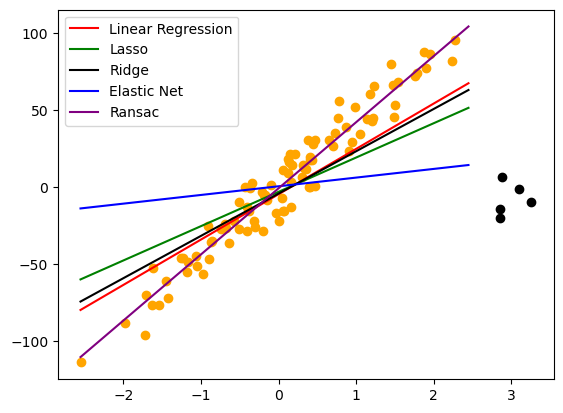

In [64]:
#Graphs

plt.scatter(X[inliner],y[inliner], color='orange')
plt.scatter(X[outlier],y[outlier], color='black')

plt.plot(X_plot, plot_pred_lm, color='red', label='Linear Regression')
plt.plot(X_plot, plot_pred_lasso, color='green', label='Lasso')
plt.plot(X_plot, plot_pred_ridge, color='black', label='Ridge')
plt.plot(X_plot, plot_pred_elastic, color='blue', label='Elastic Net')
plt.plot(X_plot, plot_pred_ransac, color='purple', label='Ransac')
plt.legend()

In [51]:
coef

array(42.38550486)

In [52]:
#linear regression
lr.coef_

array([29.48897603])

In [53]:
#lasso
lasso.coef_

array([22.31447569])

In [54]:
#ridge
ridge.coef_

array([27.51491814])

In [56]:
#ransac
ransac.estimator_.coef_

array([42.59601951])